**Processamento Digital de Imagens - 2022/01**<br/>
**Engenharia da Computação**<br/>
**Aluno:** Gabriel Soares Baptista, 2018102117<br/>

### Questão 1

In [286]:
import numpy as np
from typing import Tuple
import matplotlib.pyplot as plt

### Funções auxiliares

In [296]:
def get_laplacian_mask() -> np.array:
    """ . """
    return np.array([-1, -1, -1, -1, 8, -1, -1, -1, -1]).reshape(3, 3)


def get_sobel_mask(orientation) -> np.array:
    """ . """
    if orientation == 'h':
        return np.array([1, 2, 1, 0 , 0, 0,-1, -2, -1]).reshape(3, 3)
    elif orientation == 'v':
        return np.array([-1, 0, 1, -2, 0, 2, -1, 0, 1]).reshape(3, 3)


def get_mean_mask(order) -> np.array:
    """ . """
    return np.ones(shape=(order, order)) * 1/(order**2)


def image_normalize(image: np.array) -> np.array:
    """ . """
    lmin = float(image.min())
    lmax = float(image.max())
    return np.round((image - lmin)/(lmax-lmin) * 255)


def convolve(image: np.array, mask: np.array) -> np.array:
    """ . """
    # flip mask
    mask = np.rot90(mask, 2)
    mask_size = mask.shape[0]

    # apply padding
    padded_image = np.pad(image, mask_size//2)
    image_convolved = np.zeros(image.shape)

    # iterate over image computing the new pixel values
    N, M = image.shape

    for i in range(0, N):
        for j in range(0, M):
            image_crop = padded_image[i: i + mask_size, j: j + mask_size]
            image_convolved[i, j] = (image_crop * mask).sum()

    return image_convolved


def image_plot(image: np.array, size: Tuple[int, int], scaled: bool = False) -> None:
    """ . """
    plt.figure(figsize=size)
    if not scaled:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.show()

### Resolução

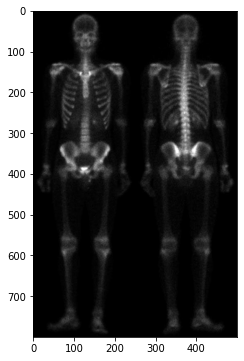

In [288]:
image = plt.imread('../images/Fig3.46(a).jpg')
image_plot(image, (5, 6))

A figura acima mostra uma varredura óssea de corpo inteiro. O objetivo é realçar a imagem de forma a aumentar sua nitidez para evidenciar os detalhes da varredura.

O procedimento que será aplicado consiste em:
1. Utilizar o laplaciano para salientar os detalhes finos;
2. Utilizar o gradiente para realçar as bordas proeminentes;
3. Amplificação da faixa dinâmica dos níveis de intensidade utilizando uma transformação.

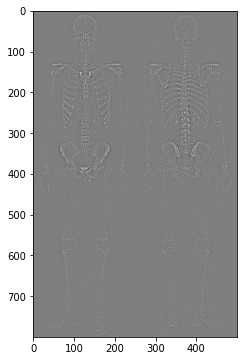

In [289]:
# compute laplacian of the image
laplacian_filter =  get_laplacian_mask()
laplacian_result = convolve(image, laplacian_filter)

# show laplacian
image_plot(laplacian_result, (5, 6))

Como podemos ver, o laplaciano é um filtro de detecção de bordas. Embora o operador laplaciano responda a transições de intensidade, raramente se utiliza na prática para detecção de bordas, uma vez que é relativamente sensível a ruídos.
Portanto, como podemos supor, a soma da imagem original com seu laplaciano gera uma imagem muito ruidosa.

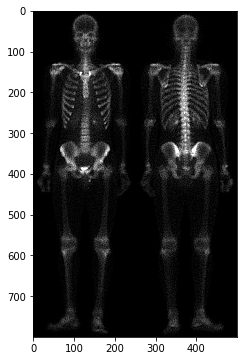

In [290]:
improved_image = image + laplacian_result
image_plot(improved_image, (5, 6), True)

Um método de reduzir esse tipo de ruido seria a aplicação de um filtro de mediana, entretanto, por se tratar de um filtro não linear pode acabar removendo características importantes que são cruciais em imagens médicas.

Portanto, uma alternativa seria utilizar o gradiente em vez do laplaciano. Uma vez que o laplaciano se trata de um operador de derivada de segunda ordem, tem a grande vantagem de realçar detalhes finos, contudo, produz resultados com mais ruído do que o gradiente.

Dessa forma, deseja-se suavizar o gradiente com um filtro de média e multiplicá-lo pela imagem laplaciana, gerando-se um filtro suavizado de gradiente.

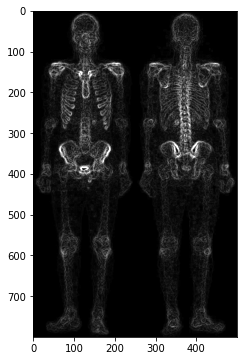

In [291]:
# get filters
vertical_sobel = get_sobel_mask('v')
horizontal_sobel = get_sobel_mask('h')

# compute convolution
gv = convolve(image, vertical_sobel)
gh = convolve(image, horizontal_sobel)
gradient_result = (gv**2 + gh**2)**0.5

#
gradient_result = gradient_result

# show gradient
image_plot(gradient_result, (5, 6), True)

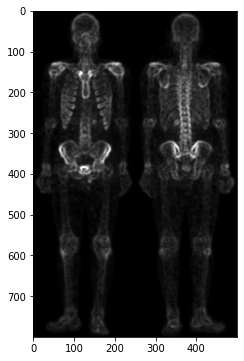

In [292]:
# compute convolution with mean filter
mean_mask = get_mean_mask(5)
smoothed_gradient = convolve(gradient_result, mean_mask)

# show smoothed gradient
image_plot(smoothed_gradient, (5, 6), True)

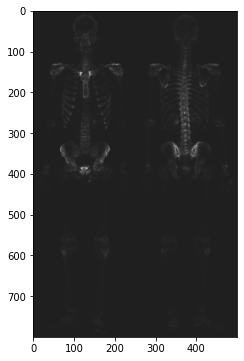

In [293]:
# show smoothed gradient multiplied by laplacian
smoothed_image = image_normalize( improved_image * smoothed_gradient)
image_plot(smoothed_image, (5, 6), False)


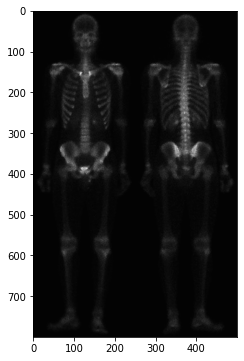

In [294]:
#
improved_image = image_normalize(image + smoothed_image)

image_plot(improved_image, (5, 6), True)


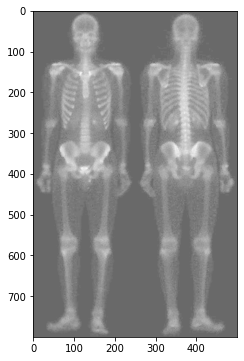

In [304]:
c = 1
gamma = 0.2

gama_transformed = c * improved_image**gamma
image_plot(gama_transformed, (5, 6), False)